##Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

##Read CSV File

In [36]:
df = pd.read_csv("train.csv")
df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [38]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


###Data Cleaning

In [39]:
df.drop(columns=['lot_size','lot_size_units','size_units'],inplace = True)

##Splitting Data

In [40]:
Y = df.price
Y

0        795000.0
1        915000.0
2        950000.0
3       1950000.0
4        950000.0
          ...    
2011     910000.0
2012     550000.0
2013    1150000.0
2014     590000.0
2015     659000.0
Name: price, Length: 2016, dtype: float64

In [41]:
X = df.drop(["price"], axis = 1)
X

,beds,baths,size,zip_code
0,3,2.5,2590.0,98144
1,4,2.0,2240.0,98106
2,4,3.0,2040.0,98107
3,4,3.0,3800.0,98199
4,2,2.0,1042.0,98102
...,...,...,...,...
2011,3,2.0,1370.0,98112
2012,1,1.0,889.0,98121
2013,4,2.0,2140.0,98199
2014,2,2.0,795.0,98103


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 55)

In [43]:
X_train.shape, Y_train.shape

((1512, 4), (1512,))

In [44]:
X_test.shape, Y_test.shape

((504, 4), (504,))

##Building Linear Regression Model


In [46]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [47]:
Y_pred = model.predict(X_test)

In [50]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-109635.39400932   47226.30527642     538.12033571   -3107.18223879]
Intercept: 305136074.311787
Mean squared error (MSE): 115228185215.33
Coefficient of determination (R^2): 0.65


##Plotting Graph

In [51]:
Y_test

1481     735000.0
682      655000.0
2008     919000.0
1160     634400.0
1322     475000.0
          ...    
1415     690000.0
993     1256000.0
725      775000.0
1753     850000.0
500      870000.0
Name: price, Length: 504, dtype: float64

In [52]:
Y_pred

array([ 777278.00502092,  788993.11523849,  831715.35477763,
        712440.87048388,  703229.5733338 ,  492444.48420811,
       2114844.05915815, 1847511.73951149, 1294001.19279945,
        873981.78435534,  741207.21591038,  687901.50707489,
        624992.69971991, 1209525.93266606,  813017.41202837,
        963924.89276224, 1925374.42906398,  588147.25383365,
        946183.64830154,  426255.68291545, 1737476.27554744,
       2289190.99014121,  532279.22758591, 1045800.05254149,
        956834.83712423, 1879679.41727138,  610185.13648874,
        546667.2445389 ,  544308.99328876, 1006540.32175106,
       3391553.86230081, 1657911.69421721,  867220.00672543,
        779780.37646496,  552973.7679767 , 1385088.74179876,
        991916.4430359 , 1225287.85703635,  478988.51009738,
       1268562.39520305,  647608.62142217, 1896346.20244092,
        466078.58515078,  768142.14021325,  752383.3151021 ,
        759205.37845713, 1119880.41336977,  774064.90292203,
       1175840.58394521,

<Axes: ylabel='price'>

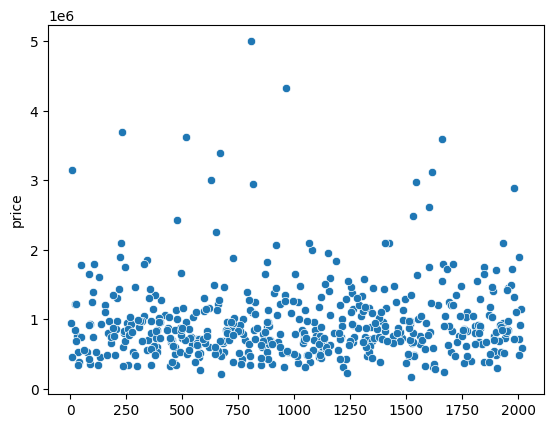

In [57]:
sns.scatterplot(Y_test)

<Axes: >

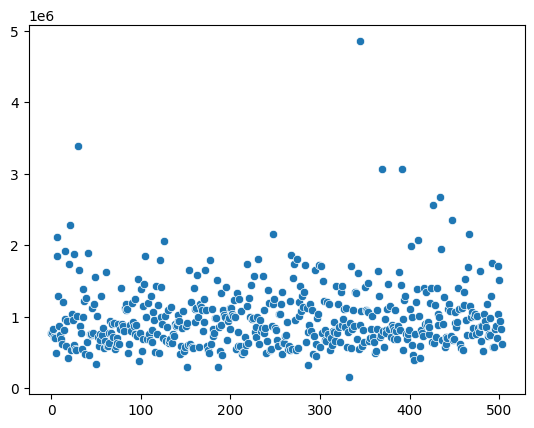

In [54]:
sns.scatterplot(Y_pred)

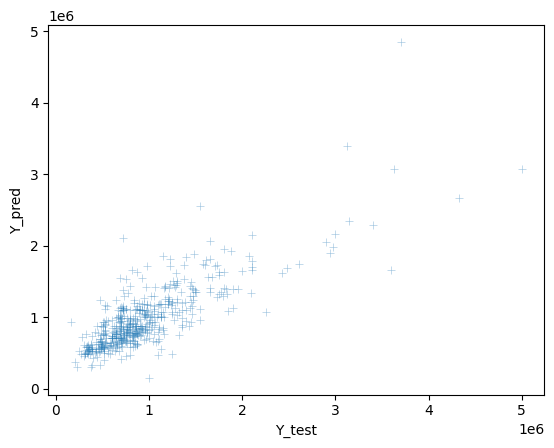

In [55]:
df = pd.DataFrame({'Y_test': Y_test, 'Y_pred': Y_pred})

sns.scatterplot(x='Y_test', y='Y_pred', data=df, marker = "+", alpha = 0.4)
plt.show()